In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# импортируем библиотечные функции -- прямое и обратное быстрое преобразование Фурье
from scipy.fft import fft, ifft

In [21]:
N = 8
m = -3
k = np.array(range(8))
x_k = np.array([1, -6, 8, -4, 0, -7, 4, -9])

assert np.shape(x_k)[0] == N

## Task 2.1 and 2.2

Пусть $x[k]$ -- дискретный сигнал, тогда дискретное преобразование Фурье (далее ДПФ) запишется следующим образом

$$X[n] = \sum \limits_{k=0}^{N-1} x[k] \exp \left(-j \frac{2 \pi}{N} n k \right)$$

ДПФ можно записать в матричной форме:

$$X = W x$$

где $W$ -- матрица размерности $N \times N$, такая, что $W_N^{kn} = \exp \left(-j \frac{2 \pi}{N} n k \right)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


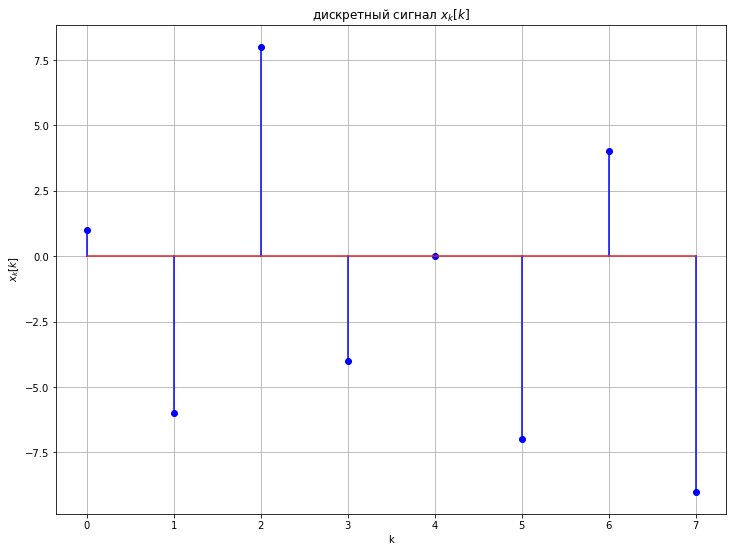

In [22]:
plt.figure(figsize=(12, 9))

plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()

#### ДПФ полученное матричным способом

In [23]:
#построим матрицу дискретного преобразования Фурье
W = np.full((N, N), 0.0 + 0.0j)

for n in range(N):
   for k in range(N):
     W[n][k] = np.exp(-1j * 2*math.pi/N * n*k)

# print(W)

n = np.array(range(8))
X_n = np.dot(W, x_k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To re

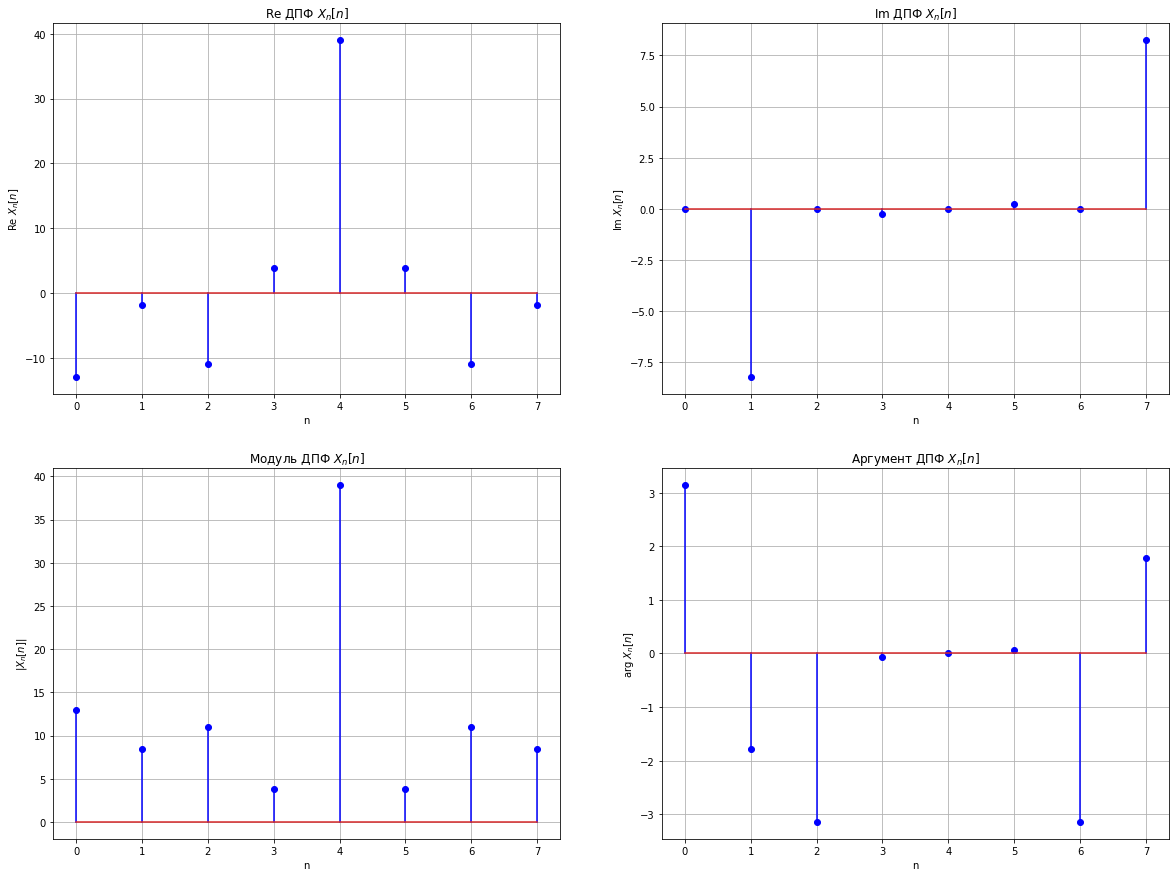

In [24]:
plt.figure(figsize=(20, 15))

# реальная часть
real_X_n = np.array([X_n[i].real for i in range(N)])
# мнимая часть
img_X_n = np.array([X_n[i].imag for i in range(N)])
# модуль
abs_X_n = np.array([abs(X_n[i]) for i in range(N)])
# аргумент
angle_X_n = np.angle(X_n)

plt.subplot(2,2,1)
plt.stem(n, real_X_n, 'b', 'bo')
plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Re $X_n[n]$') 
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, img_X_n, 'b', 'bo')
plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Im $X_n[n]$') 
plt.grid()

plt.subplot(2,2,3)
plt.stem(n, abs_X_n, 'b', 'bo')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|X_n[n]|$') 
plt.grid()

plt.subplot(2,2,4)
plt.stem(n, angle_X_n, 'b', 'bo')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'arg $X_n[n]$') 
plt.grid()

#### ДПФ, полученное быстрым преобразованием

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of indi

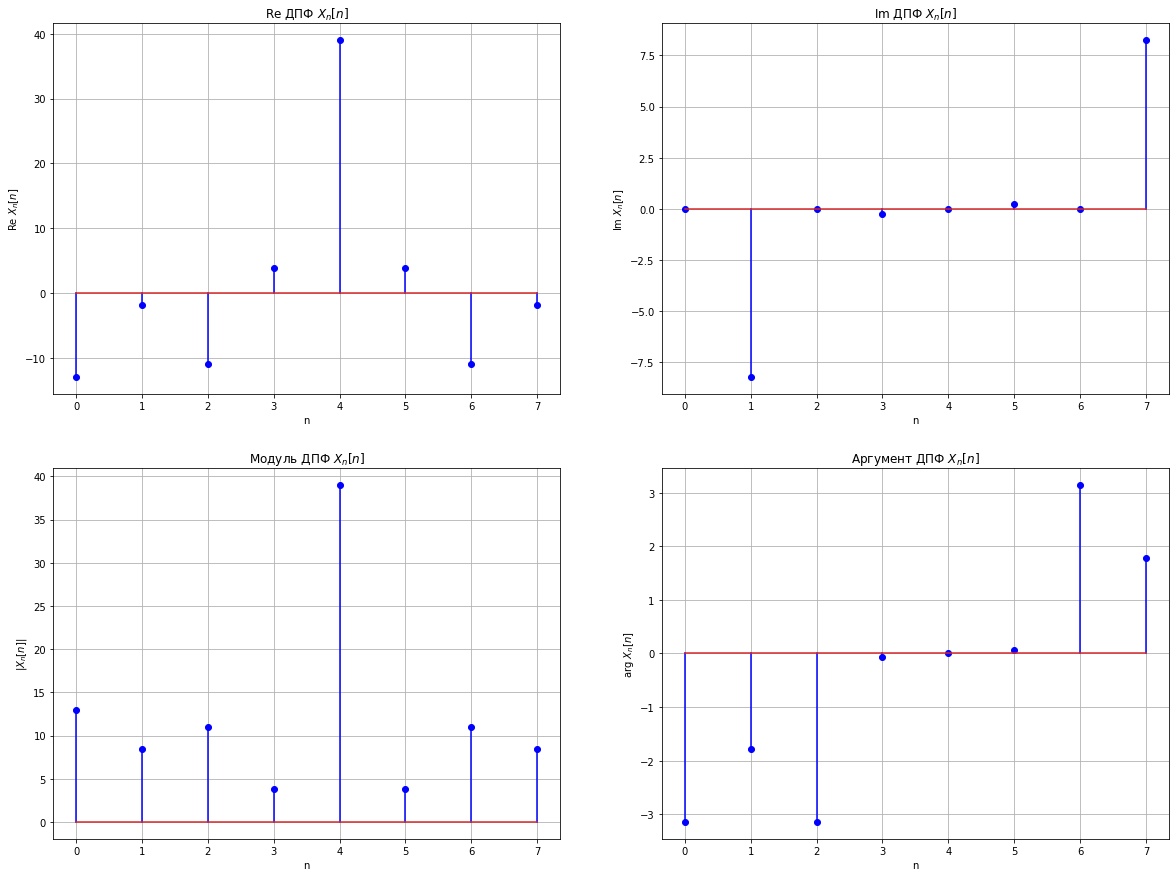

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.stem(n, fft(x_k).real, 'b', 'bo')
plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Re $X_n[n]$') 
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, fft(x_k).imag, 'b', 'bo')
plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Im $X_n[n]$') 
plt.grid()

plt.subplot(2,2,3)
plt.stem(n, abs(fft(x_k)), 'b', 'bo')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|X_n[n]|$') 
plt.grid()

plt.subplot(2,2,4)
plt.stem(n, np.angle(fft(x_k)), 'b', 'bo')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'arg $X_n[n]$') 
plt.grid()

## Task 2.3

In [29]:
Y = np.exp(-1j * 2*math.pi / N * m * n) * X_n
y = ifft(Y)
k = np.array(range(8))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float

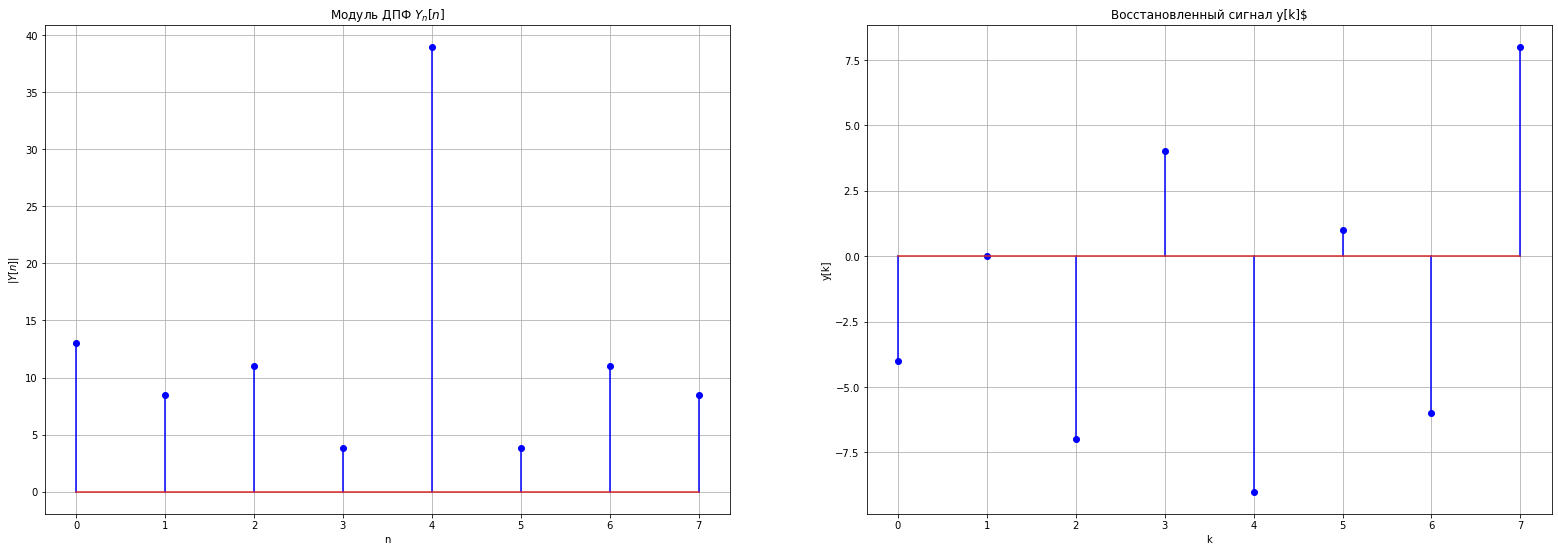

In [33]:
plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(n, abs(Y), 'b', 'bo')
plt.title(r'Модуль ДПФ $Y_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|Y[n]|$') 
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', 'bo')
plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k') 
plt.ylabel(r'y[k]') 
plt.grid()

Сравним сигналы $x[k]$ и $y[k]$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float

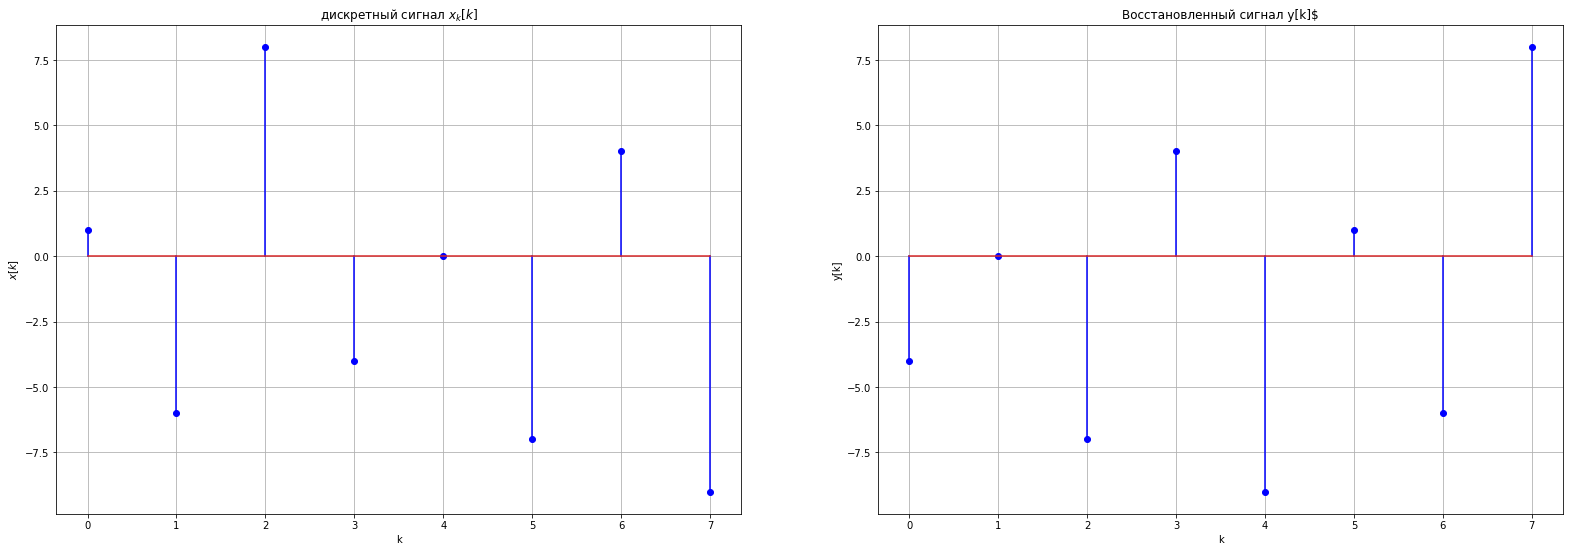

In [36]:
plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', 'bo')
plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k') 
plt.ylabel(r'y[k]') 
plt.grid()

Видно, что новый сигнал $y[k]$ можно получить из сигнала $x[k]$ циклическим сдвигом на $m$ отсчетов влево ($m < 0$).